In [42]:
import numpy as np
import os
import glob
import netCDF4
import cf
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seawater
%matplotlib inline

In [43]:
rcParams.update({'font.size': 16})

In [44]:
# Compute density for T-S couples
# to add lines on the T-S diagram
density2plot = np.arange(24,30,.5)
smin, smax, tmin, tmax = 37.0, 38.75, 12., 21.
ds, dt = 0.05, 0.1
tvec = np.arange(tmin,tmax, dt)
svec = np.arange(smin,smax, ds)
ssvec, ttvec = np.meshgrid(svec, tvec)
density = seawater.eos80.dens0(ssvec,ttvec) - 1000.0

Working on /home/ctroupin/DataOceano/CMEMS/INSITU_ARC_NRT_OBSERVATIONS_013_031/history/vessel 
 ----------------------------------
Number of files without T or S: 98
Working on /home/ctroupin/DataOceano/CMEMS/INSITU_BAL_NRT_OBSERVATIONS_013_032/history/vessel 
 ----------------------------------
Number of files without T or S: 1
Working on /home/ctroupin/DataOceano/CMEMS/INSITU_BS_NRT_OBSERVATIONS_013_034/history/vessel 
 ----------------------------------
Number of files without T or S: 0
Working on /home/ctroupin/DataOceano/CMEMS/INSITU_IBI_NRT_OBSERVATIONS_013_033/history/vessel 
 ----------------------------------
/home/ctroupin/DataOceano/CMEMS/INSITU_IBI_NRT_OBSERVATIONS_013_033/history/vessel/GL_TS_TS_FNHO_2001.nc
Number of files without T or S: 1142
Working on /home/ctroupin/DataOceano/CMEMS/INSITU_MED_NRT_OBSERVATIONS_013_035/history/vessel 
 ----------------------------------


KeyError: 'temp_qc'

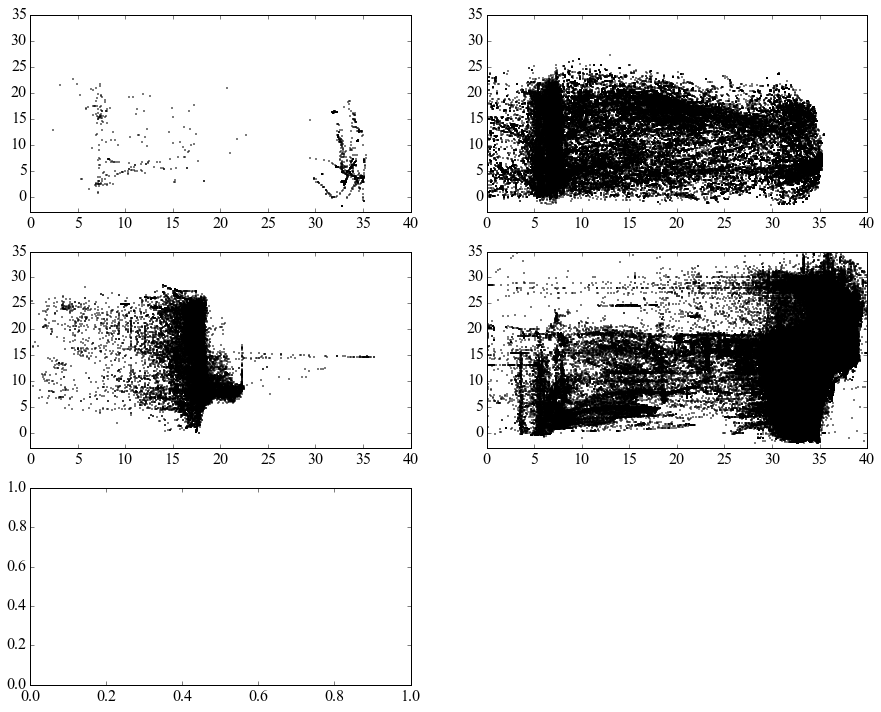

In [46]:
datadirlist = ["/home/ctroupin/DataOceano/CMEMS/INSITU_ARC_NRT_OBSERVATIONS_013_031/history/vessel", 
               "/home/ctroupin/DataOceano/CMEMS/INSITU_BAL_NRT_OBSERVATIONS_013_032/history/vessel",
               "/home/ctroupin/DataOceano/CMEMS/INSITU_BS_NRT_OBSERVATIONS_013_034/history/vessel",
              "/home/ctroupin/DataOceano/CMEMS/INSITU_IBI_NRT_OBSERVATIONS_013_033/history/vessel",
              "/home/ctroupin/DataOceano/CMEMS/INSITU_MED_NRT_OBSERVATIONS_013_035/history/vessel",
              "/home/ctroupin/DataOceano/CMEMS/INSITU_NWS_TS_REP_OBSERVATIONS_013_043/history/vessel",]

fig = plt.figure(figsize=(15, 12))

for datanum, datadir in enumerate(datadirlist):
    print('Working on %s \n ----------------------------------' %(datadir))
    filelist = sorted(glob.glob(os.path.join(datadir, '*nc')))
    ax = fig.add_subplot(3, 2, datanum + 1)
    badfiles = 0
    for datafiles in filelist:
        # print('Working on file %s' %(os.path.basename(datafiles)))
        
        try: 
            temp, psal = read_TS(datafiles)
        except AttributeError:
            print(datafiles)
            
            
        if (not len(psal)) or (not len(temp)):
            badfiles += 1
        else:
            plt.plot(psal, temp, 'ko', ms=1)
    ax.set_xlim(0, 40)
    ax.set_ylim(-3, 35)
    print("Number of files without T or S: %s" %(badfiles))
# cont = plt.contour(svec, tvec, density, levels=density2plot, colors='.65', linestyles='dashed')
#plt.clabel(cont,inline=True, fmt='%1.1f')
#plt.xlim(smin, smax)
#plt.ylim(tmin, tmax)
plt.xlabel('Salinity')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.show()

In [49]:
f = cf.read(datafile)
f.select('sea_water_temperature')

<CF Field: sea_water_temperature(time(2), ncdim%DEPTH(27)) degree_Celsius>

In [19]:
def read_TS(datafile):
    f = cf.read(datafile)
    if not f.select('sea_water_temperature'):
        T = []
    else:         
        T = f.select('sea_water_temperature').Data
    if not f.select('sea_water_salinity'):
        S = []
    else:         
        S = f.select('sea_water_salinity').Data
    f.close()
    return T, S